# East West Airlines

In [11]:
# importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [13]:
def read_data():
    data=pd.read_excel("C:/top/EastWestAirlines.xlsx")
    return data
data = read_data()
print(data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [14]:
data.copy()
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [16]:
data.shape

(3999, 12)

In [17]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: xlabel='cc1_miles', ylabel='Qual_miles'>

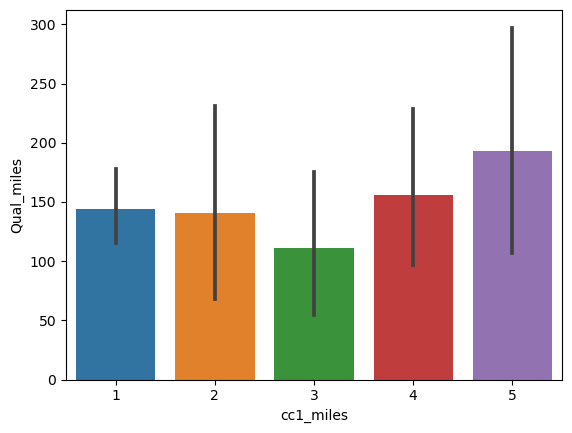

In [19]:

##Exploratory Data Analysis
sns.barplot(x = 'cc1_miles', y = 'Qual_miles',data = data)


<Axes: xlabel='cc2_miles', ylabel='Qual_miles'>

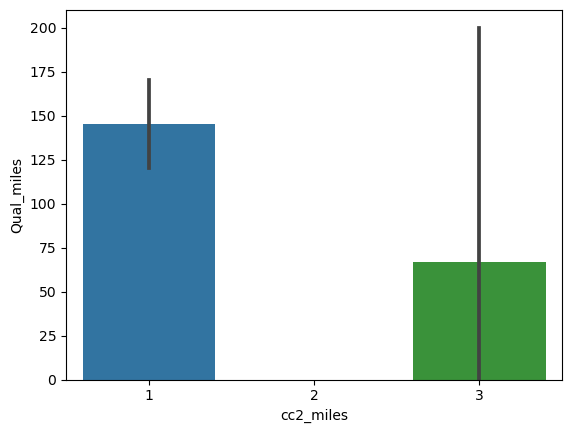

In [20]:
sns.barplot(x = 'cc2_miles', y = 'Qual_miles',data = data)

<Axes: xlabel='Bonus_trans', ylabel='Bonus_miles'>

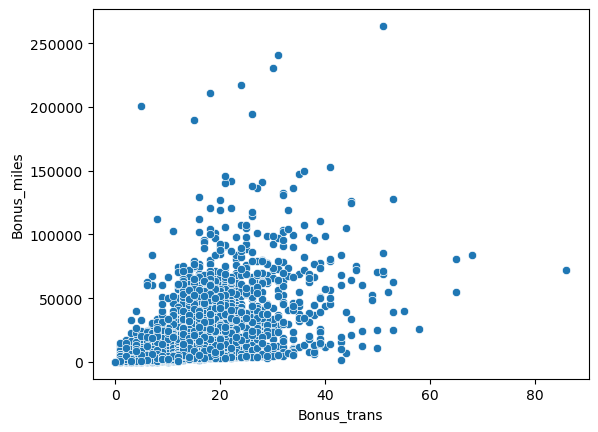

In [21]:
sns.scatterplot(x = 'Bonus_trans', y = 'Bonus_miles',data = data)

# Clustering

In [22]:

X = data[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [23]:
array = data.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [25]:
import warnings
warnings.filterwarnings("ignore")
cluster = KMeans(n_clusters=6)
cluster.fit(X)

p = cluster.predict(X)
p, len(p)

(array([0, 0, 0, ..., 4, 0, 0]), 3999)

Text(0, 0.5, 'WCSS')

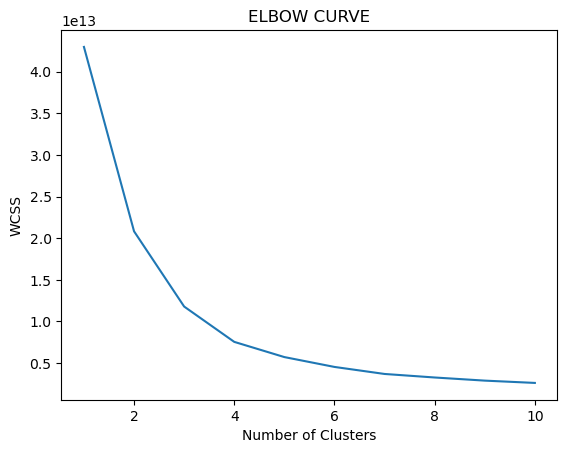

In [26]:
# creating elbow curve
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("ELBOW CURVE")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [27]:
data['Cluster'] = p
print(data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   Cluster  
0        0  
1        0  
2        0 

In [28]:
# building model
model = KMeans(n_clusters = 6)
model.fit(X)

KMeans(n_clusters=6)

In [31]:
a = model.labels_
a

array([0, 0, 0, ..., 3, 0, 0])

In [32]:
md = pd.Series(model.labels_)
data['Clust'] = md
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [33]:
data.iloc[:,1:].groupby(data.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,Clust
Clust,,,,,,,,,,,,,
0,2.321407e+04,97.089309,1.468544,1.018038,1.003520,7346.464144,8.250770,236.101628,0.741751,3696.540695,0.300044,0.00000,0.0
1,3.633193e+05,449.094017,3.188034,1.025641,1.000000,49964.743590,20.111111,1589.487179,4.735043,5668.871795,0.717949,3.00000,1.0
2,1.771839e+05,253.096639,3.071429,1.008403,1.029412,34710.457983,17.323529,901.182773,2.445378,4975.048319,0.476891,2.00000,2.0
3,8.298586e+04,153.196380,2.685973,1.009050,1.021719,25260.928507,14.862443,578.396380,1.723982,4392.234389,0.420814,3.99638,3.0
4,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000,5.00000,4.0
5,7.206212e+05,247.391304,3.478261,1.000000,1.130435,60298.173913,21.608696,1533.478261,5.521739,6259.739130,0.826087,1.00000,5.0


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

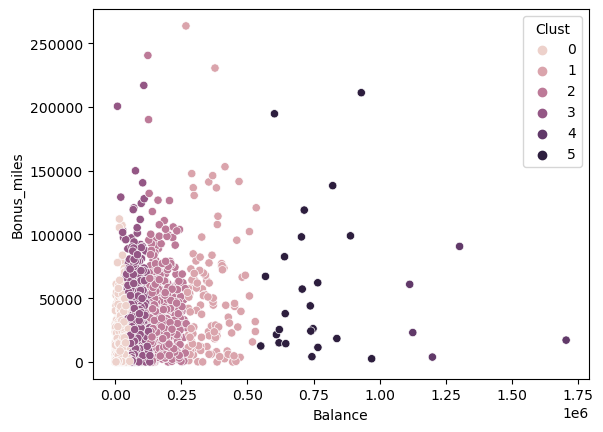

In [34]:
sns.scatterplot(x = 'Balance', y = 'Bonus_miles', hue = 'Clust',data = data)

In [35]:
print(data['Clust'].value_counts(normalize=True)*100)

0    56.839210
3    27.631908
2    11.902976
1     2.925731
5     0.575144
4     0.125031
Name: Clust, dtype: float64


In [36]:
labels = cluster.labels_
silhouette_score(X, labels,metric='euclidean')

0.5153976406355736

In [37]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [38]:
cluster = KMeans(n_clusters=6)
cluster.fit(X_scaled)

p1 = cluster.predict(X_scaled)
p1, len(p1)

(array([0, 0, 0, ..., 4, 0, 0]), 3999)

In [39]:
labels = cluster.labels_
silhouette_score(X_scaled, labels,metric='euclidean')

0.3331400869007593